# <i>Assignment:</i> Hopfield Network Project
<font color=red>I can't find your work.</font>

For this project we will be creating Hopfield networks with 100 neurons. Recall that activity of neurons in a Hopfield net are restricted to be either zero or one. You can therefore think of activity in the network as a length-100 binary array. In this abstract form, network activity is hard to think about. The following methods provide a way to visualize network activity as a 10x10 matrix

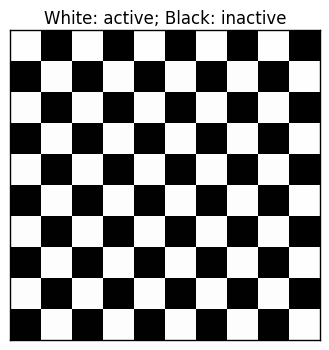

In [23]:
from scipy import misc
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def array_to_matrix(a):
    return a.reshape((10,10))

def draw_matrix(M, axis):
    axis.imshow(M, cmap='gray', interpolation='none')
    axis.set_xticks([])
    axis.set_yticks([])
    
def draw_array(A, axis):
    draw_matrix(array_to_matrix(A), axis)

# This creates an activity pattern that will look like a checkerboard
example_activity = np.array([(i%2)*int(i/10)%2 + (1-i%2)*(1-int(i/10)%2) for i in range(100)])
    
(figure, axis) = plt.subplots()
draw_array(example_activity, axis)
plt.title('White: active; Black: inactive')
plt.show()

## Problem 1: Figure 2
### Part A
The figure was created by training the network on $n$ random memory states of the 100 total neurons. Create and store 5 random memory states as a 5x100 matrix of zeros and ones. Draw the memory states.

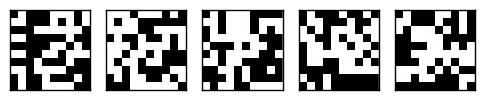

In [27]:
num_memories = 5
M = np.random.choice([0, 1], (num_memories, 100))

for i in range(num_memories):
    a = plt.subplot(int(num_memories/5),5,i+1)
    draw_array(M[i], a)
plt.show()

### Part B
Now create and draw a 100x100 weight matrix based on your 5 memory states.

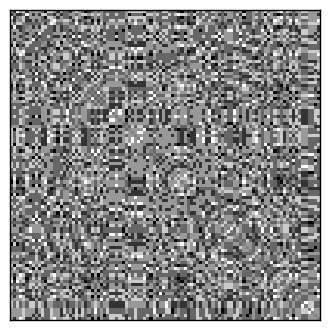

In [28]:
W = np.zeros( (100,100) )

for i in range(100):
    for j in range(100):
        for s in range(num_memories):
            W[i][j] += (2 * M[s][i] - 1) * (2 * M[s][j] - 1)
    
    W[i][i] = 0

(fig, axis) = plt.subplots()
draw_matrix(W, axis)
plt.show()

### Part C
To test for state stability, the network was started at one memory state and was allowed to update until the activity pattern stabilized. 

Start your network activity to equal your first memory state. Update network activity until the pattern of activity does not change from one time step to the next. Draw the network activity at the beginning and after stabilization.

A word of warning: be careful how you update your network activity array. If <code>x</code> is your current activity array, and <code>x_new</code> is the calculated activity array at the next time step, then you will eventually want to update your current activity to take on the new values. If you run

<code>x = x_new</code> 

then unexpected things will occur, so don't do this. Instead, run

<code>x = x_new.copy()</code>.

Finally, determine the number of errors in the stabilized array relative to the starting activity. This should be equal to the number of elements that differ from start to stable.

Number of errors:  0


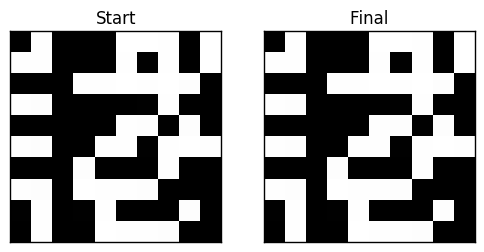

In [29]:
x = M[0]
x_start = x.copy()

stable = False
iteration_num = 0
max_iterations = 20
while not stable:
    x_new = np.zeros(100)
    
    for i in range(100):
        sum_of_all_inputs = 0
        for j in range(100):
            sum_of_all_inputs += W[i][j] * x[j]

        if sum_of_all_inputs >= 0:
            x_new[i] = 1
        else:
            x_new[i] = 0
            
    if np.array_equal(x, x_new):
        stable = True
    else:
        x = x_new.copy()
        iteration_num += 1
        if iteration_num > max_iterations:
            break

x_final = x.copy()

num_errors = np.sum(x_final != x_start)
'''
num_errors = 0
for i in range(100):
    if x_start[i] != x_final[i]:
        num_errors += 1
'''
print('Number of errors: ', num_errors)

a1 = plt.subplot(1,2,1)
draw_array(x_start, a1)
plt.title('Start')

a2 = plt.subplot(1,2,2)
draw_array(x_final, a2)
plt.title('Final')

plt.show()

### Part D
Reproduce parts A through C with 15 random memory states.

### Part E
Finally, run the model 50 times each with 5, 10, and 15 memory states. Plot histograms of the number of errors generated for each number of memory states.

## Problem 2
For this problem, we are going to work with memory states that are a bit easier to visualize. The following code produces states that look like letters, numbers, and assorted other characters when drawn as matrices. You can view the whole alphabet by opening the <a href='alphabet.bmp'>alphabet.bmp</a> file.

In [31]:
from scipy import misc

alphabet_image = misc.imread('alphabet.bmp', flatten=True, mode='P')
alphabet_image /= np.max(alphabet_image)
alphabet_image = np.round(alphabet_image)

def get_letter_as_matrix(n):
    if n >= 256:
        return
    
    row = int(n / 16)
    col = n % 16
    
    return alphabet_image[row*10:row*10+10, col*10:col*10+10]

def get_letter_as_array(n):
    M = get_letter_as_matrix(n)
    return M.ravel()

Some possible memory states:


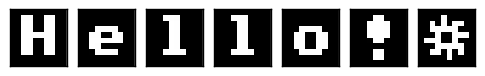

In [33]:
print('Some possible memory states:')
letter_indices = [72, 101, 108, 108, 111, 33, 15]

for i in range(len(letter_indices)):
    a = plt.subplot(1, len(letter_indices), i+1)
    letter = get_letter_as_matrix(letter_indices[i])
    draw_matrix(letter, a)

plt.show()

### Part A: Pattern completion
Train the network with two letters. Start the network activity with activity determined by one of the letters, currupted so that 1/2 of neurons that should be on start off. Does the network stabilize to the correct completed pattern?

Memories:


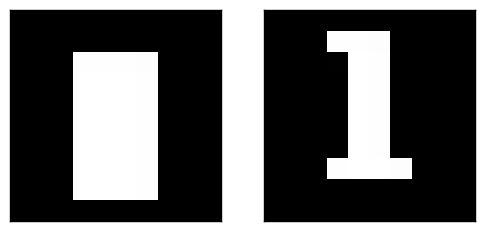

Weight matrix:


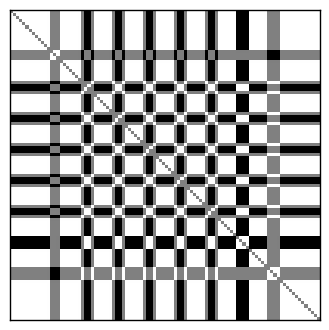

Starting state:


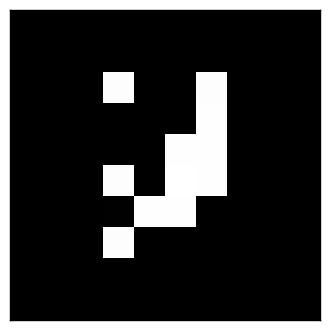

Final state:


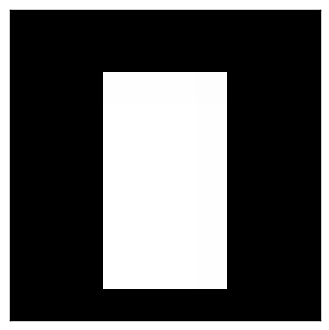

In [56]:
# create memory states
num_memories = 2
M = np.zeros((num_memories,100))
for i in range(num_memories):
    M[i] = get_letter_as_array( np.random.choice(256) )

print('Memories:')
for i in range(num_memories):
    a = plt.subplot(1, num_memories, i+1)
    draw_array(M[i], a)
plt.show()

# train network
W = np.zeros( (100,100) )
for i in range(100):
    for j in range(100):
        for s in range(num_memories):
            W[i][j] += (2 * M[s][i] - 1) * (2 * M[s][j] - 1)    
    W[i][i] = 0
print('Weight matrix:')
(fig, axis) = plt.subplots()
draw_matrix(W, axis)
plt.show()

# start from corrupted state
x = M[0].copy()
for i in range(100):
    if x[i] == 1 and np.random.uniform() > .5:
        x[i] = 0
x_start = x.copy()

print('Starting state:')
(fig, axis) = plt.subplots()
draw_array(x_start, axis)
plt.show()

stable = False
iteration_num = 0
max_iterations = 100
while not stable:
    x_new = np.zeros(100)
    
    for i in range(100):
        sum_of_all_inputs = 0
        for j in range(100):
            sum_of_all_inputs += W[i][j] * x[j]

        if sum_of_all_inputs >= 0:
            x_new[i] = 1
        else:
            x_new[i] = 0
            
    if np.array_equal(x, x_new):
        stable = True
    else:
        x = x_new.copy()
        iteration_num += 1
        if iteration_num > max_iterations:
            break

x_final = x.copy()

print('Final state:')
(fig, axis) = plt.subplots()
draw_array(x_final, axis)
plt.show()

### Part B: Working memory capacity
Re-run Part A with more memory states to determine, roughly, when recall breaks down.

### Part C: Mind wandering
Using two memory states, start from a random pattern of activity and let the network evolve until stable. Draw beginning and end network states.